In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
from tqdm import tqdm
from scipy.stats import norm

In [5]:
angles = pd.read_csv('../../../data/commaai/test_files/val_file_filtered/angle.csv', header = None)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 6.000e+00, 7.000e+00, 4.000e+00, 9.000e+00, 4.000e+00,
        7.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 1.000e+01,
        1.500e+01, 3.500e+01, 5.200e+01, 1.190e+02, 1.890e+02, 2.720e+02,
        2.840e+02, 3.100e+02, 3.790e+02, 5.510e+02, 1.681e+03, 2.988e+03,
        1.327e+03, 5.890e+02, 4.200e+02, 3.180e+02, 2.680e+02, 2.500e+02,
        1.500e+02, 5.700e+01, 2.900e+01, 1.100e+01, 1.300e+01, 9.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00,
        5.000e+00, 7.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 6.000e+00,
        1.000e+00, 4.000e+00, 1.000e+0

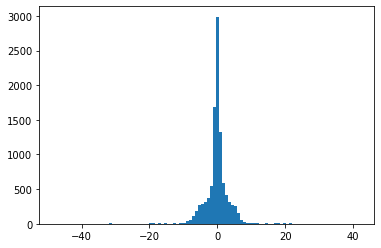

In [6]:
plt.hist(angles[0], bins = 100)

In [7]:
np.mean(abs(angles[0] - 0))

2.1570091673032854

In [9]:
np.mean(abs(angles[0] ) <= 6)

0.9321046600458365

In [ ]:
min(angles[0])

In [10]:
mean_squared_error(angles[0], np.repeat(0, len(angles[0])))

14.610926279602749

In [11]:
rmse = sqrt(mean_squared_error(angles[0], np.repeat(0, len(angles[0]))))

In [12]:
rmse

3.8224241365398934

## with transformed values

In [13]:
# read density
density = pd.read_csv('../../../data/commaai/density/gaussian_density_filtered.csv')

In [14]:
def find_closest_element(y: float, arr: np.ndarray):
    index = np.searchsorted(arr,y)
    if (index >= 1) & (index < arr.shape[0]):
        res = [arr[index - 1], arr[index]]
    elif (index < arr.shape[0]):
        return np.array(index)
    else:
        return np.array(index - 1)

    if res[0] == res[1]:
        return np.array(index - 1)
    else:
        diff_pre = np.abs(y-res[0])
        diff_aft = np.abs(y-res[1])
        if diff_pre == diff_aft:
            return np.array(index - 1)
        else:
            return index - 1 if diff_pre < diff_aft else index
def Fy(y, density):
    integral = density.loc[find_closest_element(y, density['axes']),'cdf']
    return(integral)  

In [15]:
tqdm.pandas()
angles['trans'] = angles[0].progress_apply(lambda x: norm.ppf(Fy(x, density)))

/home/hofmancl/.local/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 10472/10472 [00:07<00:00, 1410.37it/s]


In [16]:
x_0 = norm.ppf(Fy(0, density))

In [17]:
# mean absolute error

In [17]:
np.mean(abs(angles['trans'] - x_0))

0.7853872419255722

In [18]:
# mean squared error
mean_squared_error(angles['trans'], np.repeat(x_0, len(angles[0])))

0.9920698639121995

In [19]:
# rms
rms = sqrt(mean_squared_error(angles['trans'], np.repeat(x_0, len(angles[0]))))
rms

0.9960270397495239

In [20]:
# accuracy
np.mean(abs(angles[0]) <= norm.ppf(Fy(6, density)))

0.6511650114591291